# POSTTEST 5

Import library yg diperlukan

In [100]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

mengatur dataset beserta membaca dataset

In [101]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
data = pd.read_csv('player_stats.csv',encoding="utf-8")



copy data berdasarkan untuk melakukan training model beserta x dan y

In [102]:
data_copy = data.copy()
x = data_copy.iloc[:, 1:-1]
y = data_copy.iloc[:, -1]

Memperbaikin data yang kosong dengan cara whitespace

In [103]:
whitespace_df = data_copy.applymap(lambda x: x.isspace() if isinstance(x, str) else False)
whitespace_df.iloc[::1050]


,Unnamed: 0,match_id,game_id,team,score_team,opponent,score_opp,win_lose,map,map_pick,player_id,player,agent,rating,acs,kill,death,assist,kast%,adr,hs%,fk,fd
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1050,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,True,True,True,True,False
2100,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3150,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4200,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5250,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


mengubah data kosong tadi menjadi data NaN

In [104]:
data_copy = data_copy.applymap(lambda x: np.nan if isinstance(x, str) and x.isspace() else x)
baris_dengan_null = data_copy[data_copy.isna().any(axis=1)]
baris_dengan_null

,Unnamed: 0,match_id,game_id,team,score_team,opponent,score_opp,win_lose,map,map_pick,player_id,player,agent,rating,acs,kill,death,assist,kast%,adr,hs%,fk,fd
1050,1050,53713,119677,ZETA,13,TS,15,opponent win,Haven,opponent pick,999,Laz,sova,NaN,NaN,25,20,16,NaN,NaN,NaN,NaN,NaN
1051,1051,53713,119677,ZETA,13,TS,15,opponent win,Haven,opponent pick,1000,crow,breach,NaN,NaN,16,20,9,NaN,NaN,NaN,NaN,NaN
1052,1052,53713,119677,ZETA,13,TS,15,opponent win,Haven,opponent pick,424,Dep,jett,NaN,NaN,17,23,8,NaN,NaN,NaN,NaN,NaN
1053,1053,53713,119677,ZETA,13,TS,15,opponent win,Haven,opponent pick,6668,SugarZ3ro,omen,NaN,NaN,17,20,10,NaN,NaN,NaN,NaN,NaN
1054,1054,53713,119677,ZETA,13,TS,15,opponent win,Haven,opponent pick,1395,TENNN,killjoy,NaN,NaN,20,22,2,NaN,NaN,NaN,NaN,NaN
1055,1055,53713,119677,TS,15,ZETA,13,team win,Haven,team pick,2333,BORKUM,omen,NaN,NaN,12,21,17,NaN,NaN,NaN,NaN,NaN
1056,1056,53713,119677,TS,15,ZETA,13,team win,Haven,team pick,2334,JessieVash,sova,NaN,NaN,24,15,12,NaN,NaN,NaN,NaN,NaN
1057,1057,53713,119677,TS,15,ZETA,13,team win,Haven,team pick,2679,DubsteP,killjoy,NaN,NaN,22,17,2,NaN,NaN,NaN,NaN,NaN
1058,1058,53713,119677,TS,15,ZETA,13,team win,Haven,team pick,7405,Jremy,raze,NaN,NaN,21,21,4,NaN,NaN,NaN,NaN,NaN
1059,1059,53713,119677,TS,15,ZETA,13,team win,Haven,team pick,8504,invy,breach,NaN,NaN,26,21,8,NaN,NaN,NaN,NaN,NaN


Mengisi data yg NaN sesuai tipe datanya

In [105]:
nilai_na =data_copy.isna().sum()
kolom_dengan_data_null = data_copy.columns[data_copy.any()].tolist()
for kolom in kolom_dengan_data_null:
    if nilai_na[kolom] > 0:
        tipe_data_kolom = data_copy[kolom].dtype
        print(tipe_data_kolom)
        if tipe_data_kolom == 'int64':
            median = data_copy[kolom].median()
            data_copy[kolom].fillna(median, inplace=True)
        elif tipe_data_kolom == 'float64':
            mean = data_copy[kolom].mean()
            data_copy[kolom].fillna(mean, inplace=True)
        elif tipe_data_kolom == 'object':
            modus = data_copy[kolom].mode()[0]
            data_copy[kolom].fillna(modus, inplace=True)

object
object
object
object
object
object
object


mengubah data persenan menjadi data float

In [106]:
data_copy["kast%"] =data_copy['kast%'].str.rstrip('%').astype(float) /100
data_copy['hs%'] = data_copy['hs%'].str.rstrip('%').astype(float) /100

melakukan encoder untuk data kategorikal dan number

In [107]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
LabelEncoder = LabelEncoder()
Ordinalencoding = OrdinalEncoder()

data_copy["win_lose"] = LabelEncoder.fit_transform(data_copy[["win_lose"]])
data_copy["map_pick"] = LabelEncoder.fit_transform(data_copy[["map_pick"]])
data_copy["map"] = Ordinalencoding.fit_transform(data_copy[["map"]])
data_copy["opponent"] = Ordinalencoding.fit_transform(data_copy[["opponent"]])
data_copy["team"] = Ordinalencoding.fit_transform(data_copy[["team"]])
data_copy["player"] = Ordinalencoding.fit_transform(data_copy[["player"]])
data_copy["agent"] = Ordinalencoding.fit_transform(data_copy[["agent"]])


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Supervised learning

Mengimplementasi metode SVM dengan x memakai score_team,score_opp,team dan targetnya win_lose untuk memprediksi kemenangan

In [108]:
x = data_copy[['score_team', 'score_opp','team']]
y = data_copy['win_lose']
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.25)


untuk implementasi linear Regression

In [109]:
svc = SVC(kernel= 'linear')
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)


membuat hasil prediksi dengan Confusion Matrix dan menampilkan Hasilnya

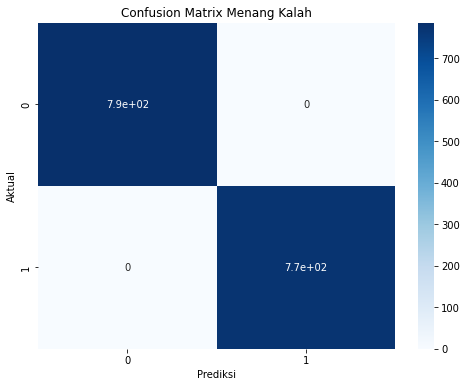

Confusion Matrix:
[[786   0]
 [  0 772]]
Akurasi model SVM: 1.0
Presisi: 1.0
Recall: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       786
           1       1.00      1.00      1.00       772

    accuracy                           1.00      1558
   macro avg       1.00      1.00      1.00      1558
weighted avg       1.00      1.00      1.00      1558



In [110]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
conf_matrix = confusion_matrix(y_test, y_pred)

# Menampilkan matriks kebingungan sebagai heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues")
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix Menang Kalah')
plt.show()

# Mengukur akurasi model
accuracy = accuracy_score(y_test, y_pred)

# Menghitung presisi dan recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Menampilkan hasil
print("Confusion Matrix:")
print(conf_matrix)
print(f'Akurasi model SVM: {accuracy}')
print(f'Presisi: {precision}')
print(f'Recall: {recall}')
report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)


menampilkan plot hasil prediksi

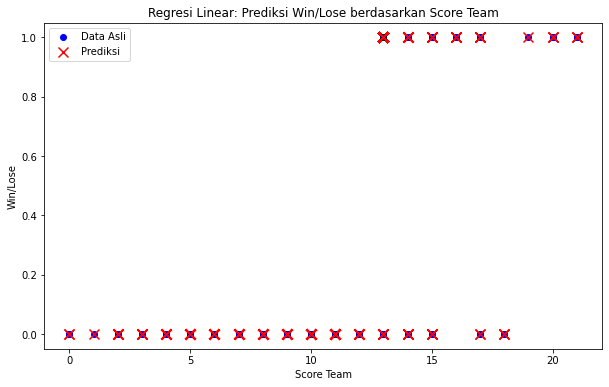

In [113]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test['score_team'], y_test, color='blue', label='Data Asli')
plt.scatter(X_test['score_team'], y_pred, color='red', label='Prediksi', marker='x', s=100)
plt.xlabel('Score Team')
plt.ylabel('Win/Lose')
plt.title('Regresi Linear: Prediksi Win/Lose berdasarkan Score Team')
plt.legend()
plt.show()

mengimplementasi Linear Regression dan menampilkan hasil prediksinya

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
X = data_copy[['score_team', 'score_opp']]
y = data_copy['rating']

# Split data menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model regresi linear
model = LinearRegression()

# Latih model pada data pelatihan
model.fit(X_train, y_train)

# Lakukan prediksi pada data pengujian
y_pred = model.predict(X_test)

# Evaluasi performa model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

# Menghitung R2-Score
r2 = r2_score(y_test, y_pred)
print(f'R2-Score: {r2}')

MAE: 0.18349333378639493
MSE: 0.05284128402712967
RMSE: 0.22987232114182357
R2-Score: 0.35619161484080053


## Unsupervised Learning

Melakukan implementasi metode K-Means

In [ ]:
from sklearn.cluster import KMeans
x = data_copy[['score_opp','score_team']]
k =10
kmeans = KMeans(n_clusters=k, n_init=10)    


In [ ]:
kmeans.fit(x)


KMeans(n_clusters=10, n_init=10)

In [ ]:
labels = kmeans.labels_
data_copy["cluster"] = labels
centroids = kmeans.cluster_centers_

Menampilkan hasil cluster dengan 3 metrik evaluasi

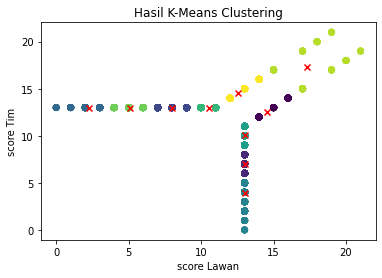

In [ ]:
plt.scatter(x['score_opp'], x['score_team'], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x')
plt.xlabel('score Lawan')
plt.ylabel('score Tim')
plt.title('Hasil K-Means Clustering')
plt.show()


melakukan evaluasi cluster yang sudah diprediksi 

In [ ]:
from sklearn.metrics import silhouette_score,davies_bouldin_score,calinski_harabasz_score
silhouette_avg = silhouette_score(x, labels)
davies_bouldin = davies_bouldin_score(x, labels)
calinski_harabasz = calinski_harabasz_score(x, labels)
print(f"Silhouette Score: {silhouette_avg}")
print(f"Davies-Bouldin Index: {davies_bouldin}")
print(f"Calinski-Harabasz Index: {calinski_harabasz}")

Silhouette Score: 0.6093285306149615
Davies-Bouldin Index: 0.5303223786579969
Calinski-Harabasz Index: 19399.05238680044


In [ ]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, homogeneity_score, completeness_score,v_measure_score

In [ ]:
cross_tab = pd.crosstab(data_copy["cluster"], data_copy["team"])
print("Cross-Tabulation:")
print(cross_tab, "\n")

Cross-Tabulation:
team     0.0   1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   9.0   10.0  \
cluster                                                                     
0          20     0     5     0     0     5     0     5    25    25     5   
1          30    10    15     5     0    30    45    35    10    25    20   
2          10     5    15     5     0    70     5    40    25    70    60   
3           0     0     5     0     0     0     0    15     0    20    35   
4          15     5    15    10     0    20    25    25    15    25    10   
5          10     5    40    15     0    20    30    60    20    80    20   
6          20     0     0     5     0    10     0    45    20    40    30   
7          10     0    15     5     5    35     5    50    25    65    65   
8           0     0     5     0     0     0     0     5     5     0     0   
9          15     0    10    10     0    10     0    15    10    20    15   

team     11.0  12.0  13.0  14.0  15.0  16.0  17.0  18.0  

In [ ]:
ari = adjusted_rand_score(data_copy["team"], labels)
print(f"Adjusted Rand Index (ARI): {ari:.2f}")
true_labels_num = data_copy["team"].astype("category").cat.codes
nmi = normalized_mutual_info_score(true_labels_num, labels)
print(f"Normalized Mutual Information (NMI): {nmi:.2f}")
# Fungsi HCV-M
homogeneity = homogeneity_score(data_copy["team"], labels)
completeness = completeness_score(data_copy["team"], labels)
v_measure = v_measure_score(data_copy["team"], labels)
print(f"Homogeneity Score: {homogeneity:.2f}")
print(f"Completeness Score: {completeness:.2f}")
print(f"V-Measure Score: {v_measure:.2f}")

Adjusted Rand Index (ARI): 0.01
Normalized Mutual Information (NMI): 0.06
Homogeneity Score: 0.05
Completeness Score: 0.08
V-Measure Score: 0.06
